## Importing Libraries

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Connecting to Database

In [2]:
# Database connection details
host = "srv610.hstgr.io"
user = "u385006994_freelance"
password = "FredbAc3s5"

try:
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
    cursor = conn.cursor()

    # List all databases
    cursor.execute("SHOW DATABASES;")
    databases = cursor.fetchall()
    
    print("Tables in database:")
    for db in databases:
        print(db[0])

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("Database connection closed.")


Tables in database:
information_schema
u385006994_databoks
Database connection closed.


In [3]:
database_name = "u385006994_databoks"  # Actual database name

try:
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database_name
    )
    cursor = conn.cursor()

    # List all tables in the selected database
    cursor.execute("SHOW TABLES;")
    tables = cursor.fetchall()
    
    print(f"Tables in '{database_name}':")
    for table in tables:
        print(table[0])

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("Database connection closed.")


Tables in 'u385006994_databoks':
cuaca_kabkota_new
data
Database connection closed.


In [4]:
table_name = "data"  # Replace with an actual table name

try:
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database_name
    )
    cursor = conn.cursor()

    # Get column names
    cursor.execute(f"DESCRIBE {table_name};")
    columns = [col[0] for col in cursor.fetchall()]
    
    print(f"Columns in '{table_name}': {columns}")

    # Fetch first 5 rows
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
    rows = cursor.fetchall()

    # Convert to DataFrame
    df = pd.DataFrame(rows, columns=columns)
    display(df)

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("Database connection closed.")

Columns in 'data': ['id', 'id_nama_data', 'indikator', 'satuan', 'data_x', 'data_y', 'namadata_tsidx', 'date_created']


,id,id_nama_data,indikator,satuan,data_x,data_y,namadata_tsidx,date_created
0,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,"31-01-2001,28-02-2001,31-03-2001,30-04-2001,31...","29257.0,29107.0,28673.0,28713.0,28594.0,28638....",Cadangan Devisa BI Menurut Jenis Total Indones...,2025-01-30 05:33:40
1,181121,8453,Total Nilai Ekspor Bulanan,US$,"31-01-1993,28-02-1993,31-03-1993,30-04-1993,31...","3001900000.0,2892500000.0,3008500000.0,2957500...",Total Nilai Ekspor Impor Bulanan Ekspor Indone...,2025-01-30 05:50:12
2,181124,8453,Total Nilai Impor Bulanan,US$,"31-01-1993,28-02-1993,31-03-1993,30-04-1993,31...","2143100000.0,2015900000.0,2191200000.0,2234800...",Total Nilai Ekspor Impor Bulanan Impor Indones...,2025-01-30 05:50:12
3,183171,9350,Pertumbuhan PDB Harga Konstan Menurut Lapangan...,persen,"31-03-2011,30-06-2011,30-09-2011,31-12-2011,31...","6.48,6.27,6.01,5.94,6.11,6.21,5.94,5.87,5.54,5...",Laju Pertumbuhan PDB Harga Konstan (Triwulanan...,2025-01-30 05:56:34


Database connection closed.


In [5]:
csv_filename = "exported_data.csv"

df.to_csv(csv_filename, index=False)
print(f"Dataset has been successfully exported to '{csv_filename}'")

Dataset has been successfully exported to 'exported_data.csv'


## Data Transformation

In [6]:
def transform_long_format(df):
    long_format_data = []
    
    for _, row in df.iterrows():
        dates = row['data_x'].split(',')
        values = row['data_y'].split(',')
        
        if len(dates) == len(values):
            for date, value in zip(dates, values):
                long_format_data.append({
                    'id': row['id'],
                    'id_nama_data': row['id_nama_data'],
                    'indikator': row['indikator'],
                    'satuan': row['satuan'],
                    'date': date,
                    'value': float(value) if value else None,  # Convert to float
                    'namadata_tsidx': row['namadata_tsidx']
                })

    return pd.DataFrame(long_format_data)

# Apply transformation
df_long = transform_long_format(df)

# Convert 'date' column to datetime format
df_long['date'] = pd.to_datetime(df_long['date'], errors='coerce')
df_long.head()

/var/folders/0t/tym83fts64b5fv862t1vq5lm0000gn/T/ipykernel_27540/3505989653.py:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_long['date'] = pd.to_datetime(df_long['date'], errors='coerce')


,id,id_nama_data,indikator,satuan,date,value,namadata_tsidx
0,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2001-01-31,29257.0,Cadangan Devisa BI Menurut Jenis Total Indones...
1,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2001-02-28,29107.0,Cadangan Devisa BI Menurut Jenis Total Indones...
2,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2001-03-31,28673.0,Cadangan Devisa BI Menurut Jenis Total Indones...
3,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2001-04-30,28713.0,Cadangan Devisa BI Menurut Jenis Total Indones...
4,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2001-05-31,28594.0,Cadangan Devisa BI Menurut Jenis Total Indones...


In [7]:
# Only records from 2015 to 2024
df_long = df_long[(df_long['date'].dt.year >= 2015) & (df_long['date'].dt.year <= 2024)]
df_long.head()

,id,id_nama_data,indikator,satuan,date,value,namadata_tsidx
168,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2015-01-31,114250.0,Cadangan Devisa BI Menurut Jenis Total Indones...
169,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2015-02-28,115527.0,Cadangan Devisa BI Menurut Jenis Total Indones...
170,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2015-03-31,111554.0,Cadangan Devisa BI Menurut Jenis Total Indones...
171,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2015-04-30,110867.0,Cadangan Devisa BI Menurut Jenis Total Indones...
172,329339,11164,Cadangan Devisa BI Menurut Jenis,US$ juta,2015-05-31,110771.0,Cadangan Devisa BI Menurut Jenis Total Indones...


In [8]:
missing_values = df_long.isnull().sum()
missing_values

id                0
id_nama_data      0
indikator         0
satuan            0
date              0
value             0
namadata_tsidx    0
dtype: int64

In [9]:
csv_filename = "transformed_data.csv"
df_long.to_csv(csv_filename, index=False)

print(f"Transformed dataset has been successfully exported to '{csv_filename}'")

Transformed dataset has been successfully exported to 'transformed_data.csv'


## Transform to Keep Necessary Data

In [10]:
# Pivoting the DataFrame to create columns for each indicator
df_wide = df_long.pivot(index='date', columns='indikator', values='value')
df_wide = df_wide.reset_index()
df_wide.columns.name = None 

print(df_wide)

          date  Cadangan Devisa BI Menurut Jenis  \
0   2015-01-31                          114250.0   
1   2015-02-28                          115527.0   
2   2015-03-31                          111554.0   
3   2015-04-30                          110867.0   
4   2015-05-31                          110771.0   
..         ...                               ...   
115 2024-08-31                          150243.0   
116 2024-09-30                          149922.0   
117 2024-10-31                          151233.0   
118 2024-11-30                          150243.0   
119 2024-12-31                               NaN   

     Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)  \
0                                                  NaN                                
1                                                  NaN                                
2                                                 4.83                                
3                          

In [11]:
csv_filename = "transformed_data2.csv"
df_wide.to_csv(csv_filename, index=False)

print(f"Transformed dataset has been successfully exported to '{csv_filename}'")

Transformed dataset has been successfully exported to 'transformed_data2.csv'


## Indonesian Currency Rate Dataset

In [12]:
currency_file_path = "/Users/morenomusadat/Proyek Predictive Analytics/Price/Indonesia.csv"
df_currency = pd.read_csv(currency_file_path, delimiter=";")
df_currency.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Perubahan%,No
0,01/12/24,"16.090,0","15.870,0","16.322,5","15.830,0","1,58%",120
1,01/11/24,"15.840,0","15.705,0","15.971,5","15.617,5","0,96%",119
2,01/10/24,"15.690,0","15.175,0","15.778,5","15.167,5","3,67%",118
3,01/09/24,"15.135,0","15.497,5","15.583,5","15.065,0","-2,04%",117
4,01/08/24,"15.450,0","16.255,0","16.281,5","15.295,0","-4,95%",116


In [13]:
df_currency = df_currency[['Tanggal', 'Terakhir', 'Tertinggi', 'Terendah']]

df_currency['Tanggal'] = pd.to_datetime(df_currency['Tanggal'], format="%d/%m/%y", errors='coerce')
df_currency.rename(columns={'Tanggal': 'date'}, inplace=True)

df_currency['Terakhir'] = df_currency['Terakhir'].str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.').astype(float)
df_currency['Tertinggi'] = df_currency['Tertinggi'].str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.').astype(float)
df_currency['Terendah'] = df_currency['Terendah'].str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.').astype(float)

df_wide['date'] = pd.to_datetime(df_wide['date'], errors='coerce')
df_currency['date'] = df_currency['date'] + pd.offsets.MonthEnd(0)

df_merged = pd.merge(df_wide, df_currency, on='date', how='left')
df_merged


,date,Cadangan Devisa BI Menurut Jenis,Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY),Total Nilai Ekspor Bulanan,Total Nilai Impor Bulanan,Terakhir,Tertinggi,Terendah
0,2015-01-31,114250.0,NaN,1.324490e+10,1.261230e+10,12665.0,12757.5,12410.0
1,2015-02-28,115527.0,NaN,1.217280e+10,1.151010e+10,12920.0,12945.0,12587.5
2,2015-03-31,111554.0,4.83,1.363400e+10,1.260870e+10,13070.0,13248.0,12900.0
3,2015-04-30,110867.0,NaN,1.310460e+10,1.262630e+10,12960.0,13077.5,12805.0
4,2015-05-31,110771.0,NaN,1.275470e+10,1.161360e+10,13223.0,13243.0,12976.0
...,...,...,...,...,...,...,...,...
115,2024-08-31,150243.0,NaN,2.344030e+10,2.066520e+10,15450.0,16281.5,15295.0
116,2024-09-30,149922.0,NaN,2.205550e+10,1.882460e+10,15135.0,15583.5,15065.0
117,2024-10-31,151233.0,NaN,2.442160e+10,2.193830e+10,15690.0,15778.5,15167.5
118,2024-11-30,150243.0,NaN,2.399820e+10,1.963170e+10,15840.0,15971.5,15617.5


### Forward Filling Variable Cadangan Devisa

In [14]:
df_merged['Cadangan Devisa BI Menurut Jenis'].fillna(method='ffill', inplace=True)
df_merged.isnull().sum()

/var/folders/0t/tym83fts64b5fv862t1vq5lm0000gn/T/ipykernel_27540/2240744526.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Cadangan Devisa BI Menurut Jenis'].fillna(method='ffill', inplace=True)


date                                                                               0
Cadangan Devisa BI Menurut Jenis                                                   0
Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)    82
Total Nilai Ekspor Bulanan                                                         0
Total Nilai Impor Bulanan                                                          0
Terakhir                                                                           0
Tertinggi                                                                          0
Terendah                                                                           0
dtype: int64

### Forward Filling and Backward Filling Variable Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)

In [15]:
# Forward Filling
df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'].fillna(method='ffill', inplace=True)
df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'].fillna(method='bfill', inplace=True)

df_merged.isnull().sum()
df_merged

/var/folders/0t/tym83fts64b5fv862t1vq5lm0000gn/T/ipykernel_27540/55429065.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'].fillna(method='ffill', inplace=True)
/var/folders/0t/tym83fts64b5fv862t1vq5lm0000gn/T/ipykernel_27540/55429065.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'].fillna(method='bfill', inplace=True)


,date,Cadangan Devisa BI Menurut Jenis,Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY),Total Nilai Ekspor Bulanan,Total Nilai Impor Bulanan,Terakhir,Tertinggi,Terendah
0,2015-01-31,114250.0,4.83,1.324490e+10,1.261230e+10,12665.0,12757.5,12410.0
1,2015-02-28,115527.0,4.83,1.217280e+10,1.151010e+10,12920.0,12945.0,12587.5
2,2015-03-31,111554.0,4.83,1.363400e+10,1.260870e+10,13070.0,13248.0,12900.0
3,2015-04-30,110867.0,4.83,1.310460e+10,1.262630e+10,12960.0,13077.5,12805.0
4,2015-05-31,110771.0,4.83,1.275470e+10,1.161360e+10,13223.0,13243.0,12976.0
...,...,...,...,...,...,...,...,...
115,2024-08-31,150243.0,5.05,2.344030e+10,2.066520e+10,15450.0,16281.5,15295.0
116,2024-09-30,149922.0,5.05,2.205550e+10,1.882460e+10,15135.0,15583.5,15065.0
117,2024-10-31,151233.0,5.05,2.442160e+10,2.193830e+10,15690.0,15778.5,15167.5
118,2024-11-30,150243.0,5.05,2.399820e+10,1.963170e+10,15840.0,15971.5,15617.5


In [16]:
csv_filename = "fully_merged.csv"
df_merged.to_csv(csv_filename, index=False)

print(f"Transformed dataset has been successfully exported to '{csv_filename}'")

Transformed dataset has been successfully exported to 'fully_merged.csv'


## Exploratory Data Analysis (EDA)

In [17]:
# Convert 'date' column to datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.set_index('date', inplace=True)

print(df_merged.head())

# 1. Time Series Plots
plt.figure(figsize=(14, 10))

            Cadangan Devisa BI Menurut Jenis  \
date                                           
2015-01-31                          114250.0   
2015-02-28                          115527.0   
2015-03-31                          111554.0   
2015-04-30                          110867.0   
2015-05-31                          110771.0   

            Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)  \
date                                                                                         
2015-01-31                                               4.83                                
2015-02-28                                               4.83                                
2015-03-31                                               4.83                                
2015-04-30                                               4.83                                
2015-05-31                                               4.83                                

    

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

### Line Chart


In [18]:
fig = go.Figure()

# Foreign Reserves line
fig.add_trace(go.Scatter(
    x=df_merged.index,
    y=df_merged['Cadangan Devisa BI Menurut Jenis'],
    mode='lines+markers',
    name='Foreign Reserves',
    line=dict(color='blue', width=2),
    marker=dict(size=6)
))

fig.update_layout(
    title='Cadangan Devisa BI Menurut Jenis',
    xaxis_title='Year',
    yaxis_title='Foreign Reserves (USD)',
    legend_title='Indicator',
    template='plotly_white',
    font=dict(size=12),
    hovermode='x unified'
)

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')

fig.show()

In [19]:
fig = go.Figure()

# GDP Growth line
fig.add_trace(go.Scatter(
    x=df_merged.index,
    y=df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'],
    mode='lines+markers',
    name='GDP Growth (YoY)',
    line=dict(color='green', width=2),
    marker=dict(size=6)
))

fig.update_layout(
    title='Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)',
    xaxis_title='Year',
    yaxis_title='GDP Growth (%)',
    legend_title='Indicator',
    template='plotly_white',
    font=dict(size=12),
    hovermode='x unified'
)

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')

fig.show()

In [30]:
fig = go.Figure()

# Exports line
fig.add_trace(go.Scatter(
    x=df_merged.index,
    y=df_merged['Total Nilai Ekspor Bulanan'],
    mode='lines+markers',
    name='Exports',
    line=dict(color='orange', width=2),
    marker=dict(size=6)
))

# Imports line
fig.add_trace(go.Scatter(
    x=df_merged.index,
    y=df_merged['Total Nilai Impor Bulanan'],
    mode='lines+markers',
    name='Imports',
    line=dict(color='red', width=2),
    marker=dict(size=6)
))

fig.update_layout(
    title='Total Nilai Ekspor dan Import Bulanan (2015-2025)',
    xaxis_title='Year',
    yaxis_title='Value (USD, in billions)',
    legend_title='Categories',
    template='plotly_white',
    font=dict(size=12),
    hovermode='x unified'
)

fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGray')

fig.show()

### Correlation Plot

In [21]:
import plotly.express as px

# Compute the correlation matrix
numerical_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_merged[numerical_columns].corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',  # Display values in squares with 2 decimal places
    color_continuous_scale='RdBu',  # Valid Plotly color scale
    title='Interactive Correlation Heatmap'
)

# Customize the layout to make it larger
fig.update_layout(
    title_font_size=20,
    xaxis_title='Features',
    yaxis_title='Features',
    font=dict(size=14),
    coloraxis_colorbar=dict(title="Correlation"),
    width=1600,  # Increase width
    height=900   # Increase height
)

# Show the heatmap
fig.show()

### Boxplot

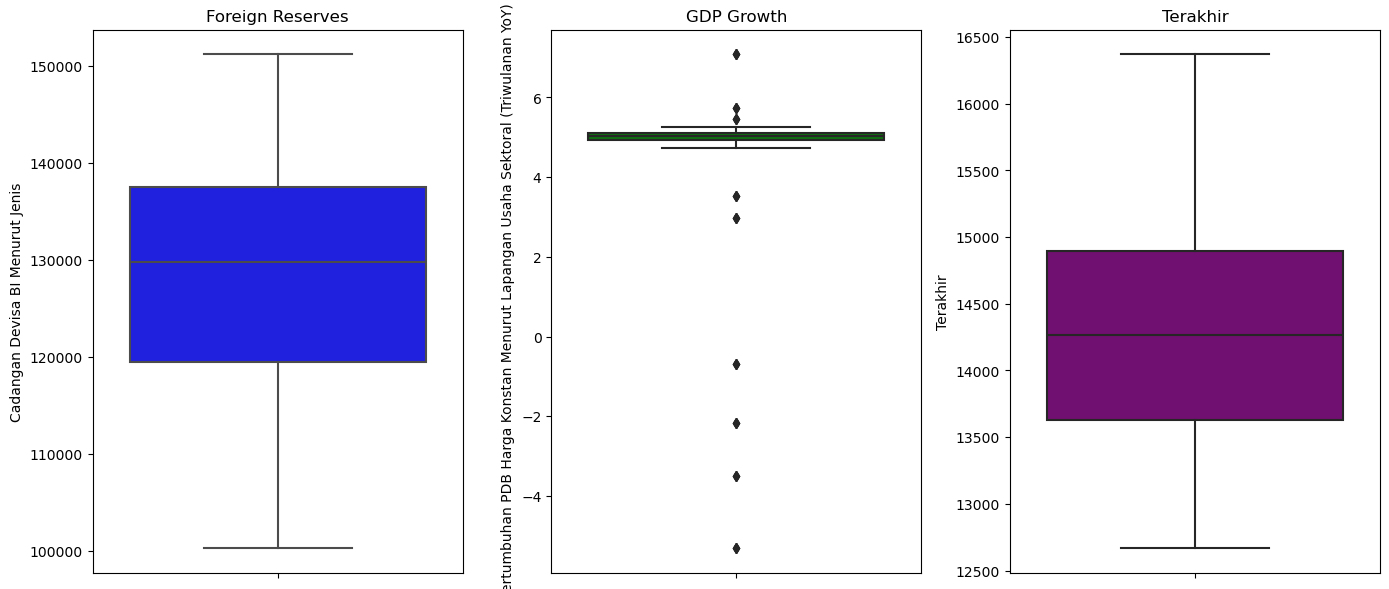

In [22]:
# Boxplots for Key Columns
plt.figure(figsize=(14, 6))

# Boxplot for Foreign Reserves
plt.subplot(1, 3, 1)
sns.boxplot(y=df_merged['Cadangan Devisa BI Menurut Jenis'], color='blue')
plt.title('Foreign Reserves')

# Boxplot for GDP Growth
plt.subplot(1, 3, 2)
sns.boxplot(y=df_merged['Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)'], color='green')
plt.title('GDP Growth')

# Boxplot for Terakhir
plt.subplot(1, 3, 3)
sns.boxplot(y=df_merged['Terakhir'], color='purple')
plt.title('Terakhir')

plt.tight_layout()
plt.show()

## Feature Importance (Permutation Importance)

### Feature Importance (Terakhir)

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Selecting features and target variable
target_variable = "Terakhir"
features = [
    "Cadangan Devisa BI Menurut Jenis",
    "Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)",
    "Total Nilai Ekspor Bulanan",
    "Total Nilai Impor Bulanan",
    "Tertinggi",
    "Terendah",
]

# Define X (features) and y (target)
X = df_merged[features]
y = df_merged[target_variable]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

                                             Feature  Importance
5                                           Terendah    0.460864
4                                          Tertinggi    0.353057
1  Pertumbuhan PDB Harga Konstan Menurut Lapangan...    0.002738
3                          Total Nilai Impor Bulanan    0.001704
0                   Cadangan Devisa BI Menurut Jenis   -0.000104
2                         Total Nilai Ekspor Bulanan   -0.002034


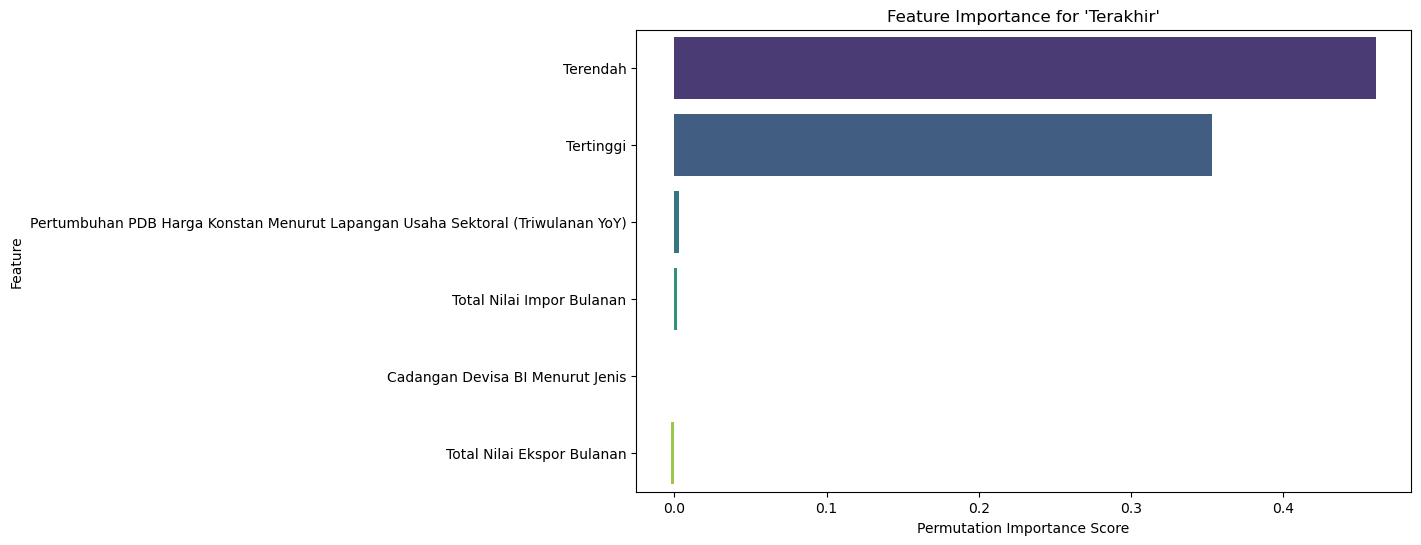

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for 'Terakhir'")
plt.show()

Interpretation: 

1. “Terendah” dan “Tertinggi”:
    
    - Mengapa Mereka Paling Tinggi:
    
        Dalam banyak data keuangan, nilai penutupan (Terakhir) secara inheren dibatasi oleh nilai terendah dan tertinggi pada periode tersebut. Fakta bahwa kedua fitur ini memiliki skor tertinggi menunjukkan bahwa model sangat  bergantung pada informasi rentang harga.

    - Alasan Ekonomi:
    
        Nilai penutupan biasanya berada di antara nilai terendah dan tertinggi. Dengan demikian, kedua fitur ini secara langsung menentukan kisaran di mana nilai penutupan dapat berada.
    
2. Pentingnya yang Rendah dari Indikator Makroekonomi dan Perdagangan:
    
    - Fitur seperti Pertumbuhan PDB, Impor, Ekspor, dan Cadangan Devisa memiliki skor yang sangat rendah atau bahkan negatif. Ini menunjukkan bahwa untuk memprediksi nilai penutupan pasar keuangan, indikator makro dan perdagangan tidak memberikan kontribusi informasi yang signifikan.

        - Alasan:
        
            Hubungan Tidak Langsung: Indikator makroekonomi cenderung mempengaruhi tren pasar dalam jangka panjang, sedangkan nilai penutupan lebih mencerminkan pergerakan harian atau periodik.

### Feature Importance (Pertumbuhan PDB)

In [26]:
# Selecting new target variable (GDP Growth) and relevant features
target_variable = "Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)"
features = [
    "Cadangan Devisa BI Menurut Jenis",  
    "Total Nilai Ekspor Bulanan",        
    "Total Nilai Impor Bulanan",         
    "Terakhir"                          
]

# Define X (features) and y (target)
X = df_merged[features]
y = df_merged[target_variable]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Print the table
print(feature_importance_df)

                            Feature  Importance
0  Cadangan Devisa BI Menurut Jenis    0.898991
1        Total Nilai Ekspor Bulanan    0.542104
2         Total Nilai Impor Bulanan    0.494650
3                          Terakhir    0.023122


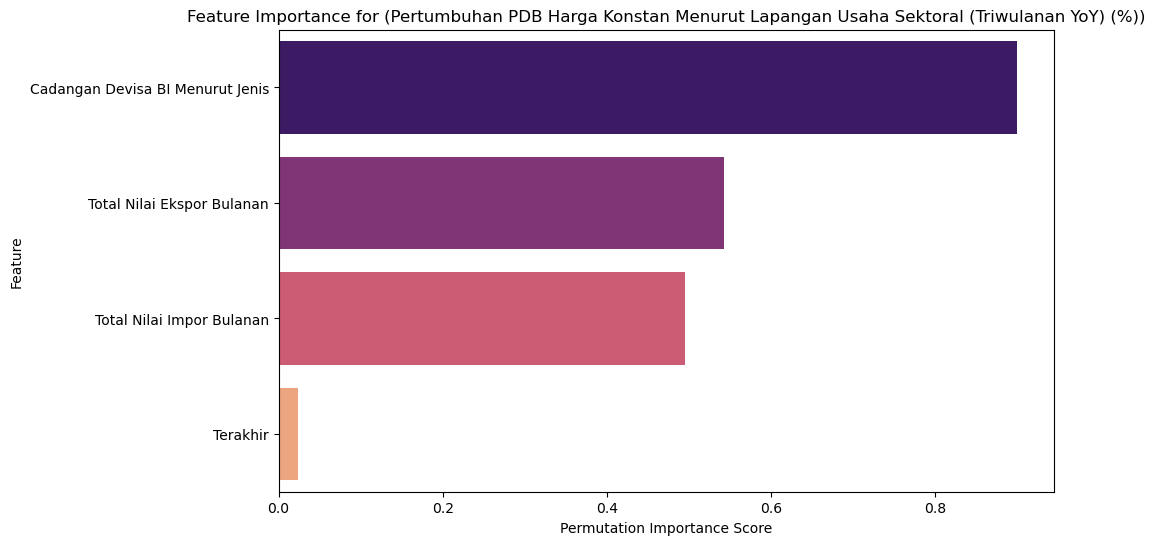

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="magma")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for (Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY) (%))")
plt.show()

Interpretation:
1. Pentingnya Cadangan Devisa yang Tinggi:

    - Mengapa Paling Dominan:

        Model menunjukkan bahwa cadangan devisa memiliki pengaruh paling kuat dalam memprediksi pertumbuhan PDB. Hal ini masuk akal karena cadangan devisa merupakan indikator kunci dalam menilai stabilitas ekonomi dan kemampuan negara menghadapi guncangan eksternal.
    - Keterkaitan Ekonomi:

        Cadangan devisa mencerminkan kesehatan ekonomi dan kredibilitas finansial suatu negara, yang pada akhirnya berdampak pada pertumbuhan PDB. Posisi cadangan yang kuat biasanya menunjukkan manajemen ekonomi yang baik dan kepercayaan pasar.

2. Importance dari Indikator Perdagangan (Ekspor dan Impor):

    - Skor yang Cukup Tinggi:
        
        Baik nilai ekspor maupun impor memiliki kontribusi yang signifikan (masing-masing sekitar 0.54 dan 0.49).

    - Alasan Ekonomi:

        - Ekspor: Secara langsung meningkatkan pendapatan nasional dengan membawa devisa asing dan mendongkrak produksi, sehingga sangat berperan dalam mendorong pertumbuhan ekonomi.

        - Impor: Walaupun merupakan arus keluar, volume impor mencerminkan skala aktivitas ekonomi dan permintaan konsumen. Pengaruhnya bisa jadi menangkap aspek neraca perdagangan yang mempengaruhi pertumbuhan PDB.

3. Kontribusi Rendah dari Indikator Keuangan (“Terakhir”):

    - Mengapa Rendah:
    
        Nilai penutupan suatu aset keuangan (Terakhir) lebih menggambarkan sentimen pasar jangka pendek dan tidak memberikan gambaran yang kuat mengenai faktor-faktor fundamental yang mempengaruhi pertumbuhan ekonomi secara keseluruhan.

### Feature Importance (Cadangan Devisa BI Menurut Jenis)

In [28]:
# Selecting new target variable (Foreign Exchange Reserves) and relevant features
target_variable = "Cadangan Devisa BI Menurut Jenis"
features = [
    "Total Nilai Ekspor Bulanan",       
    "Total Nilai Impor Bulanan",   
    "Pertumbuhan PDB Harga Konstan Menurut Lapangan Usaha Sektoral (Triwulanan YoY)", 
    "Terakhir",                          
    "Tertinggi",                         
    "Terendah"                           
]

# Define X (features) and y (target)
X = df_merged[features]
y = df_merged[target_variable]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Print the table
print(feature_importance_df)

                                             Feature  Importance
0                         Total Nilai Ekspor Bulanan    1.174303
2  Pertumbuhan PDB Harga Konstan Menurut Lapangan...    0.209190
5                                           Terendah    0.101145
4                                          Tertinggi    0.033282
3                                           Terakhir    0.013852
1                          Total Nilai Impor Bulanan   -0.005379


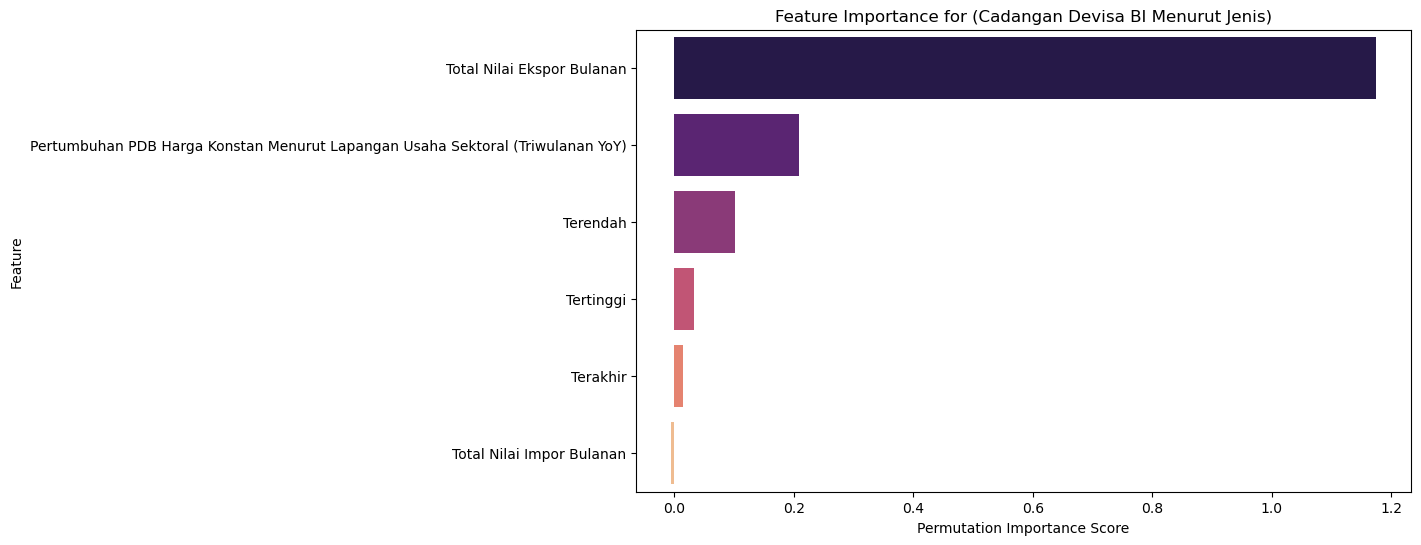

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="magma")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for (Cadangan Devisa BI Menurut Jenis)")
plt.show()

Interpretation:

1. Ekspor sebagai Prediktor Dominan:

    - Mengapa Paling Tinggi:
        
        Nilai ekspor adalah fitur yang paling penting dalam memprediksi cadangan devisa. Secara ekonomi, ekspor merupakan sumber utama masuk devisa asing, yang secara langsung meningkatkan cadangan devisa suatu negara.

    - Logika Ekonomi:

        Dengan ekspor sebagai sumber pendapatan eksternal utama, skor tinggi ini menegaskan peran fundamental ekspor dalam meningkatkan cadangan devisa.

2. Peran Moderat Pertumbuhan PDB:

    - Kontribusi yang Signifikan:

        Pertumbuhan PDB juga memiliki peran penting (skor sekitar 0.209190) karena ekonomi yang tumbuh cenderung menghasilkan neraca perdagangan yang lebih baik dan mendukung peningkatan cadangan melalui kekuatan fiskal yang lebih besar.
    - Interpretasi:

        Meskipun tidak sekuat ekspor, pertumbuhan PDB memberikan konteks ekonomi yang lebih luas yang berdampak pada akumulasi cadangan.

3. Kontribusi yang Kecil dari Indikator Keuangan (Terendah, Tertinggi, Terakhir):

    - Mengapa Skor Rendah:

        Fitur-fitur yang mencerminkan nilai pasar keuangan (rentang harga dan nilai penutupan) kurang langsung berhubungan dengan posisi cadangan devisa negara.
    - Alasan:
    
        Skor yang rendah (antara 0.013852 hingga 0.101145) menunjukkan bahwa meskipun ada korelasi antara tren pasar keuangan dan cadangan, kontribusi informasinya jauh lebih kecil dibandingkan data perdagangan.

4. Nilai Negatif pada Total Nilai Impor Bulanan:


    - Mengapa Negatif:
    
        Skor negatif menunjukkan bahwa ketika fitur impor diacak, performa model sedikit meningkat.

    - Interpretasi:

        Potensi Kebisingan: Data impor mentah mungkin menambah kebisingan atau redundansi, terutama jika pengaruh impor pada cadangan sudah tercermin lewat data ekspor.